# Report prepared by:
-   **Calvin Thai**
-   **Rodrigo Jr Gomez**
# Data set used: 
-   Medical Cost Personal Datasets
    -   https://www.kaggle.com/datasets/mirichoi0218/insurance/data

# Introduction



Our task involves a thorough exploration of a selected dataset, aiming to extract and shed light into the narratives within the data. Employing a diverse array of analytical methodologies, we used different tools and multiple tests to rigorously verify the accuracy of our findings. The chosen dataset for this investigation is the **Medical Cost Personal Datasets**. Our specific focus revolves around two key questions: firstly, identifying the age group generating the highest charges, and secondly, unraveling the criteria that wield substantial influence over insurance pricing. This endeavor is grounded in a commitment to delivering nuanced and accurate insights, shedding light on the intricate relationships and patterns that underpin financial considerations in the realm of insurance.




# Executive Summary

Following an in depth analysis of the **Medical Cost Personal Datasets** obtained from GitHub, a clear answer for our first question has emerged, highlighting the age group between 40 to 60 as the demographic that incurs the highest charges. Looking further into the dataset, we've identified that Age, BMI, the Number of Dependents (children), and smoking habits exert the most significant impact on insurance prices. These findings highlights the pivotal role of these factors in shaping insurance costs and advocate for their careful consideration in the insurance application process. Recognizing the influence of Age, BMI, family structure, and lifestyle choices, particularly smoking habits, is crucial for developing a nuanced and accurate pricing strategy. Moreover, a significant observation arises: gender does not exert an influence on insurance pricing. This insight is particularly valuable, as it enables the development of a more generalized and inclusive approach to insurance pricing, fostering fairness and equity across diverse demographic groups.

**Content / Legend**
<br> Below are what each column from the dataset represents (Taken from the data source)
<br> **age**: age of primary beneficiary
<br> **sex**: insurance contractor gender, female, male
<br> **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
<br> **children**: Number of children covered by health insurance / Number of dependents
<br> **smoker**: Smoking
<br> **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<br> **charges**: Individual medical costs billed by health insurance

# Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# Importing the Data

In [2]:
df = pd.read_csv(r"insurance.csv")

# Investigating the Data

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape #Number of rows and columns

(1338, 7)

In [6]:
df.head() #Column header

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Setting up variables

In [7]:
a1 = df['age']
a2 = df['sex']
a3 = df['bmi']
a4 = df['children']
a5 = df['smoker']
a6 = df['region']
a7 = df['charges']

# Initial Analysis of variables

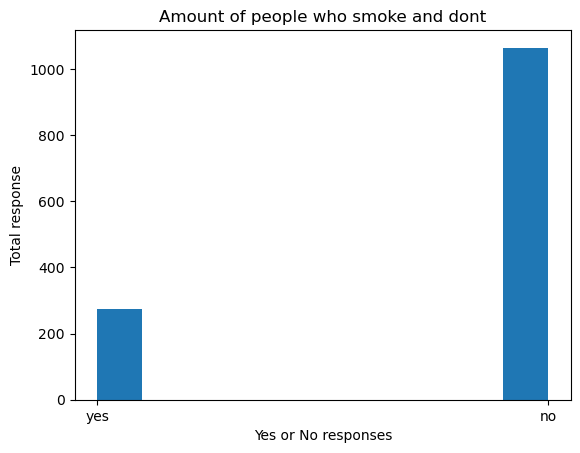

In [8]:
#Counting the smoker respondent
plt.title('Amount of people who smoke and dont')
plt.ylabel('Total response')
plt.xlabel('Yes or No responses')
plt.hist(a5)
plt.show()

Looking into the histogram, we can say that majority of our respondants doesn't smoke. Will this affect the insurance price? We will look into it further on the testing part of our report.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

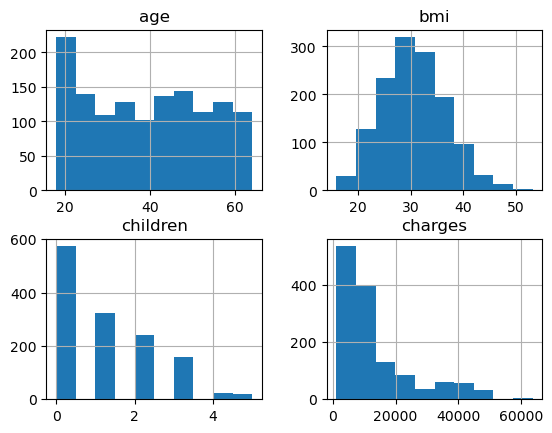

In [9]:
df.hist()

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data consist a diverse array of variables, the dataset encompasses responses from 1338 participants, notably featuring a substantial group of over 200 respondents around early twenties. The Body Mass Index (BMI), a health indicator with an optimal range of 18.5 to 24.9, exhibits a spread within our dataset, spanning from a minimum of 15.96 to whopping maximum of 53.13, with an average BMI of 30.66. Depicted in the histogram, the majority of our participants do not have dependents (children), while a distinct subset, numbering less than 200, is characterized by having 3 to 4 children. The spectrum of charges within the dataset is equally remarkable, ranging from a minimum of 1121.87 to a surprisingly high maximum of 63770. These findings collectively highlights the depth and complexity of the dataset, laying the groundwork for a thorough analysis of the various factors influencing charges in the context of insurance pricing.

# Looking for correlation

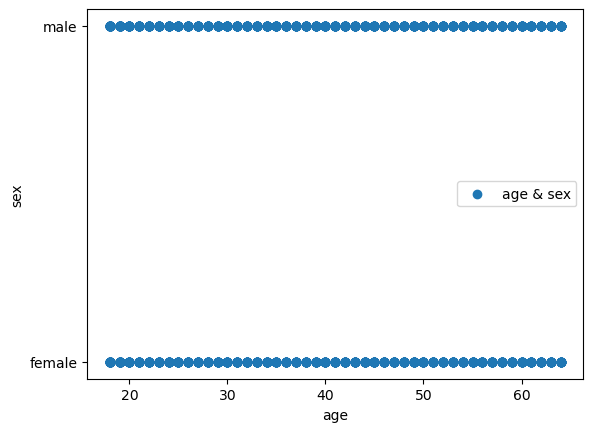

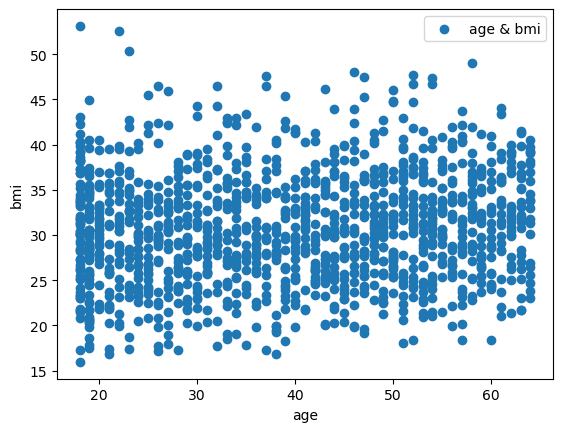

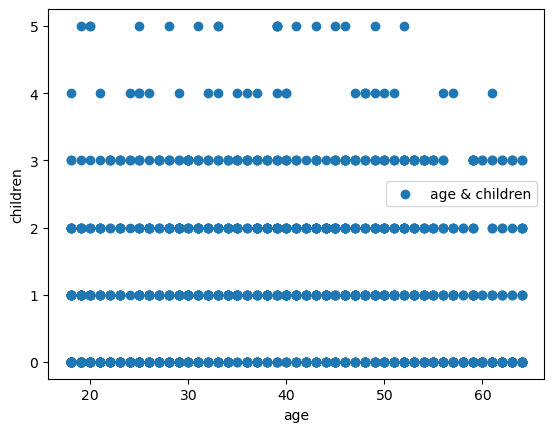

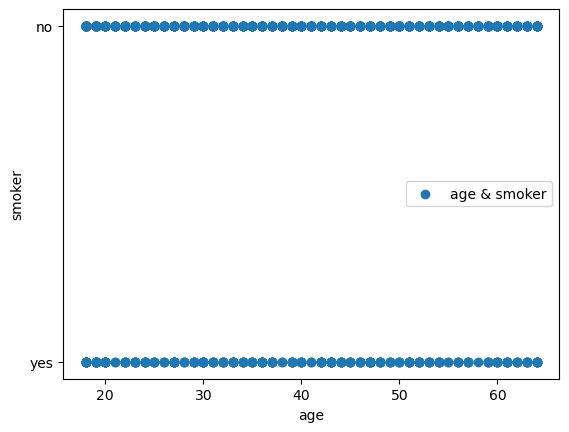

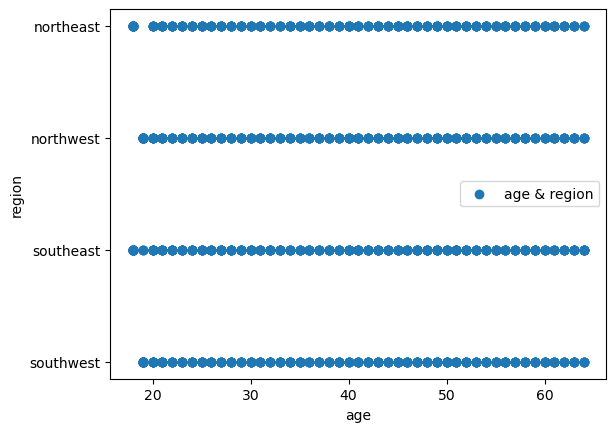

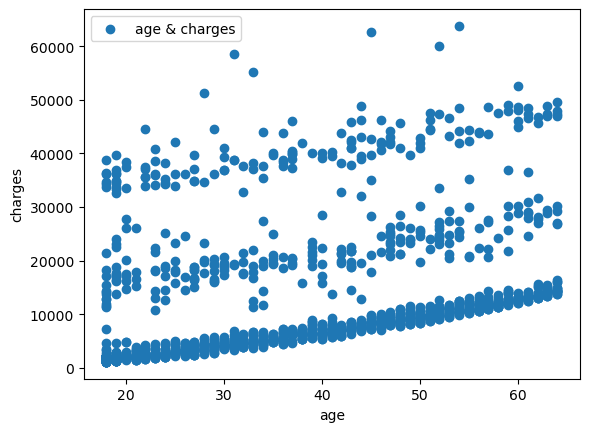

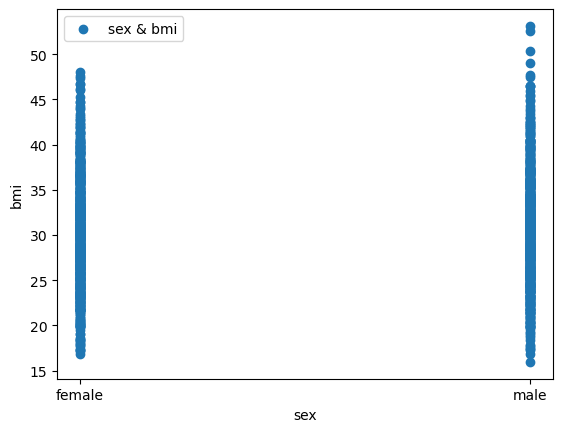

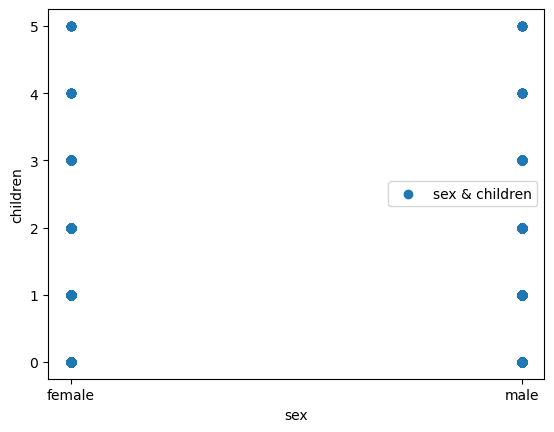

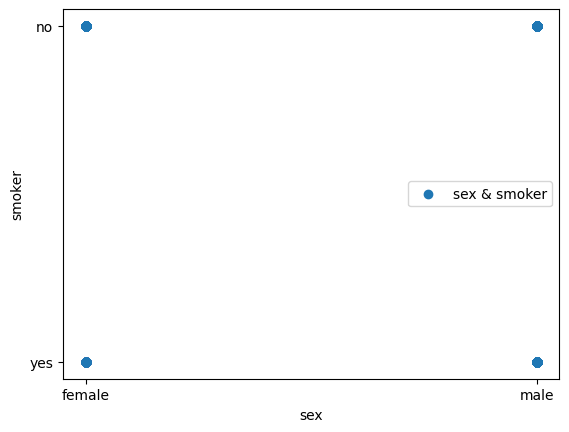

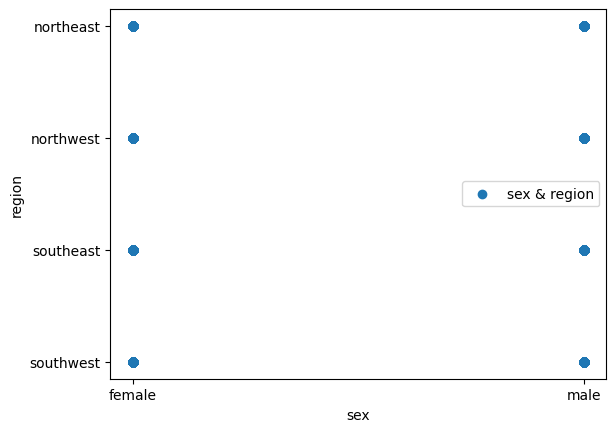

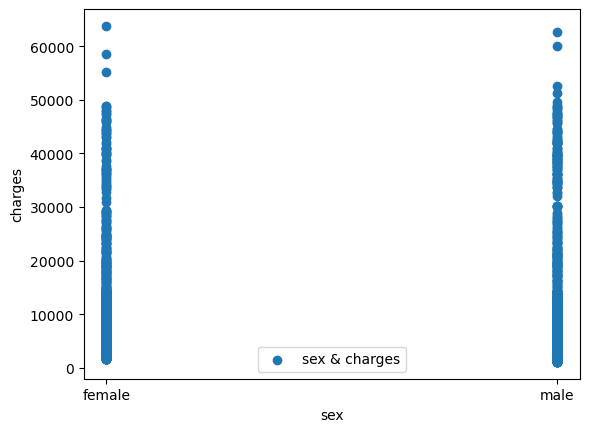

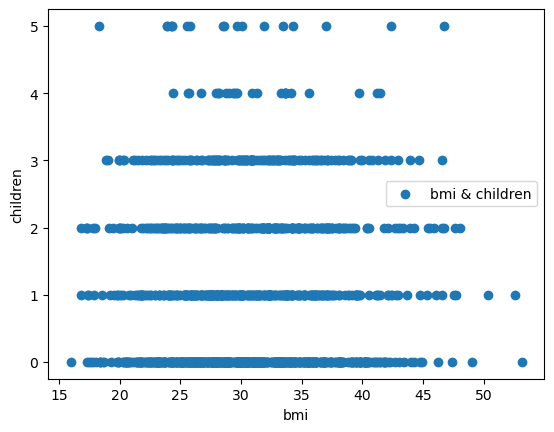

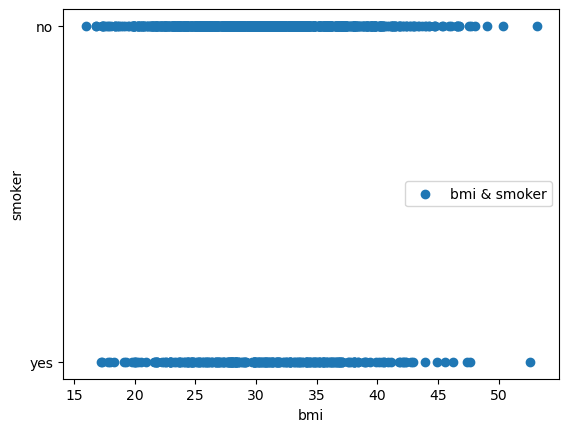

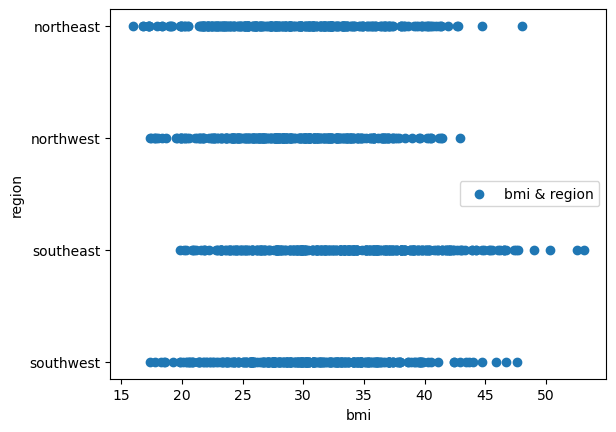

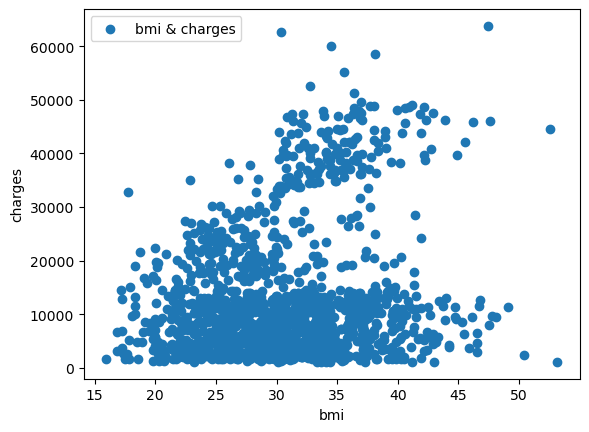

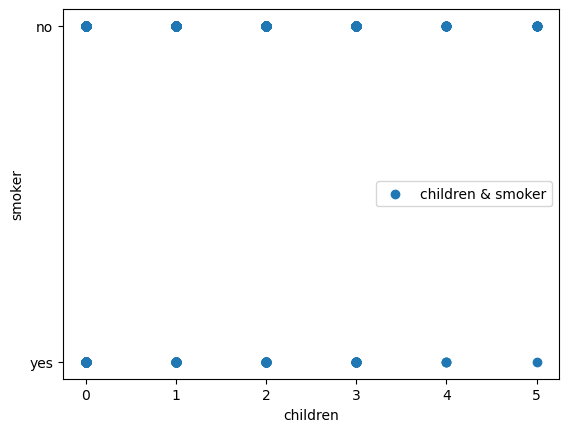

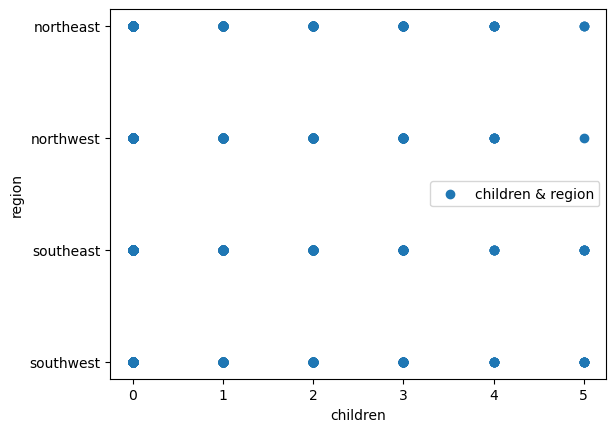

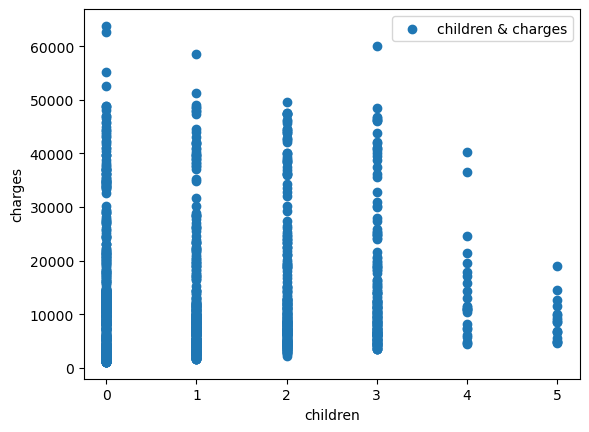

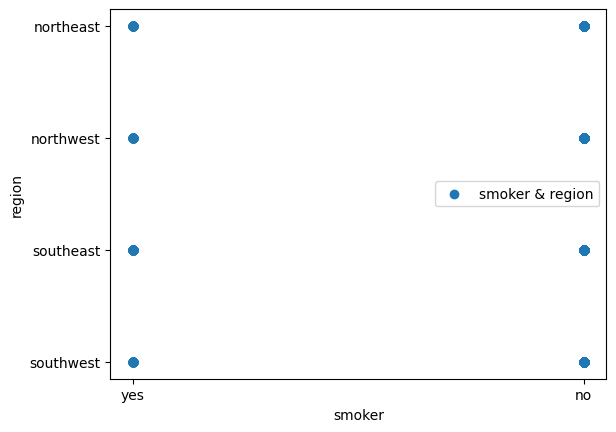

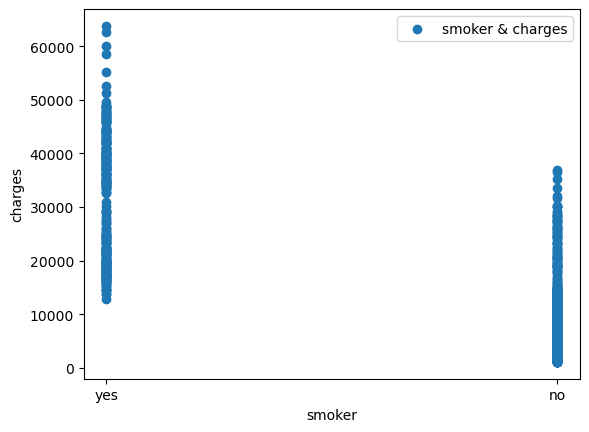

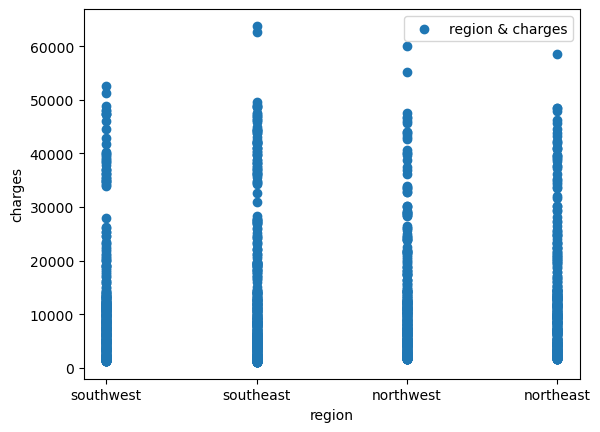

In [11]:
#Applying scatterplot for all the variables mixing them against each other 
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        col1 = variables[i]
        col2 = variables[j]

        # Scatter plot
        plt.scatter(df[col1], df[col2], label=f'{col1} & {col2}') 
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.show()

Upon examination of the scatter plot, a correlation becomes evident among **BMI, age, and charges**, forming a pattern that we can look into. To back up this observation, we shall conduct a **Spearman correlation test** between these variables, excluding sex, smoker, and region. Our rationale for excluding these variables stems from the intention to apply a uniform pricing approach across regions and the recognition that a different testing method is needed for smoker and sex variables. We shall also generate histogram to find the data that we can use for later testing. The decision to employ **Spearman rank correlation** is based on the acknowledgment that assuming **normal distribution** is **not appropriate** for our dataset, making this the most effective tool for our analysis. This strategy aims to unveil and quantify relationships, paving the way for a more accurate predictive model in the realm of insurance pricing.

# Spearman's rank correlation

In [12]:
#Running the spearman correlation to find the correlation for the values
corr_matrix=df.corr(method = 'spearman', numeric_only = True)
corr_matrix

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


In [13]:
#Ranking correlation via the highest correlation
rank = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
                  .stack()
                  .sort_values(ascending=False))
rank

age       charges     0.534392
children  charges     0.133339
bmi       charges     0.119396
age       bmi         0.107736
          children    0.056992
bmi       children    0.015607
dtype: float64

<Axes: >

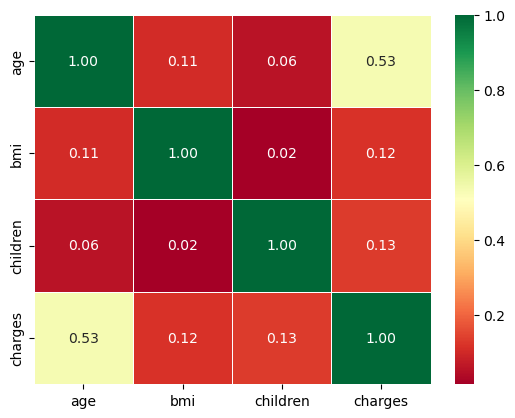

In [14]:
sns.heatmap(corr_matrix,annot=True, fmt='.2f', cmap='RdYlGn', linewidth = 0.5)

# Potential Metrics to use
Our data analysis strongly points towards **Age** as the primary factor influencing charges, exhibiting a correlation of 0.53. This finding is further backed up by the heatmap, which aligns with and reinforces the significance of age in determining charges. Alongside age, we shall also include the **number of dependents (children)** and **BMI**. These criteria’s can help create a more accurate predictions in the realm of insurance pricing considering that they still provide a positive correlation towards charges.

# Plotting new histograms based on different criterias

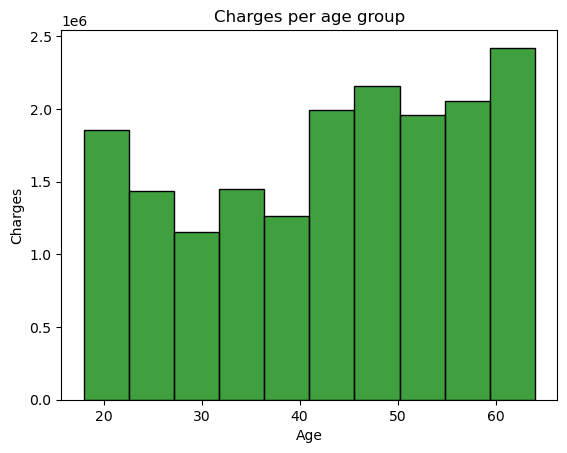

In [15]:
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges per age group')
sns.histplot(data=df, x='age', weights='charges',color = 'Green', bins = 10) #changed to bins 10, not sure if oyu like it better
plt.show()

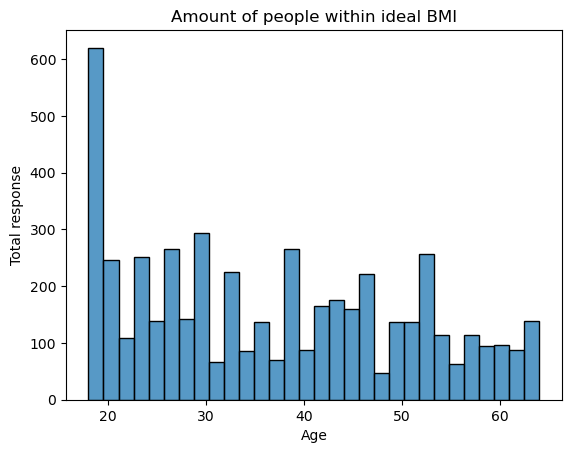

In [16]:
#Filter BMI from the ideal criteria based on the legend 
ideal_bmi = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)]
plt.xlabel('Age')
plt.ylabel('Total response')
plt.title('Amount of people within ideal BMI')
sns.histplot(data=ideal_bmi, x='age', weights='bmi',bins=30)
plt.show()

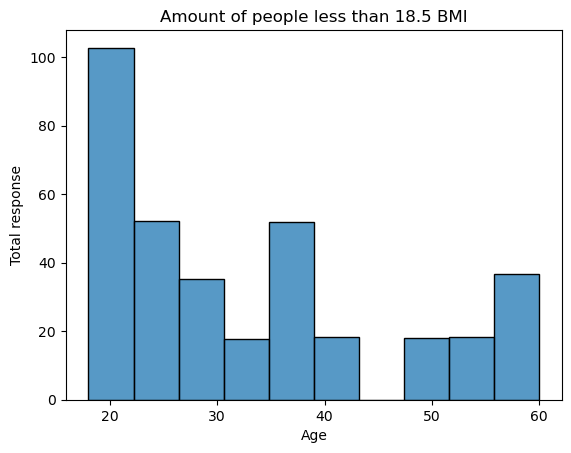

In [17]:
#Filter BMI from the ideal criteria based on the legend 
notideal_bmi = df[(df['bmi'] < 18.5)]
plt.xlabel('Age')
plt.ylabel('Total response')
plt.title('Amount of people less than 18.5 BMI')
sns.histplot(data=notideal_bmi, x='age', weights='bmi',bins=10)
plt.show()

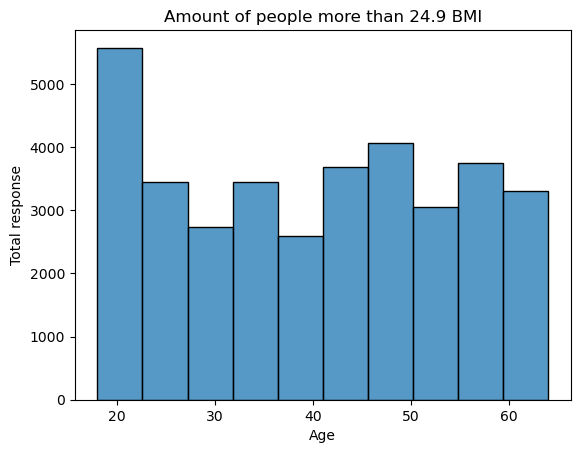

In [18]:
#Filter BMI from the ideal criteria based on the legend 
notideal_bmi = df[(df['bmi'] > 24.9)]
plt.xlabel('Age')
plt.ylabel('Total response')
plt.title('Amount of people more than 24.9 BMI')
sns.histplot(data=notideal_bmi, x='age', weights='bmi',bins=10)
plt.show()


The insights derived from the histogram above confirm that the age group spanning from 40 to 60 incurs the highest charges, providing answer to our initial question. Furthermore, the filtered histogram, on BMI considerations, highlights the significance of BMI as an ideal criterion for our predictive model. The prevalence of individuals outside the optimal BMI range within this dataset suggests that omitting BMI from our insurance pricing considerations could result in substantial financial implications in the face of BMI-related health issues. We will now take a look at the number of people who smokes based on the age group we mentioned. Generating additional histograms, we are looking for information’s and correlations that will contribute to refining our model, ensuring a comprehensive incorporation of key criterias for a more accurate and effective insurance pricing.

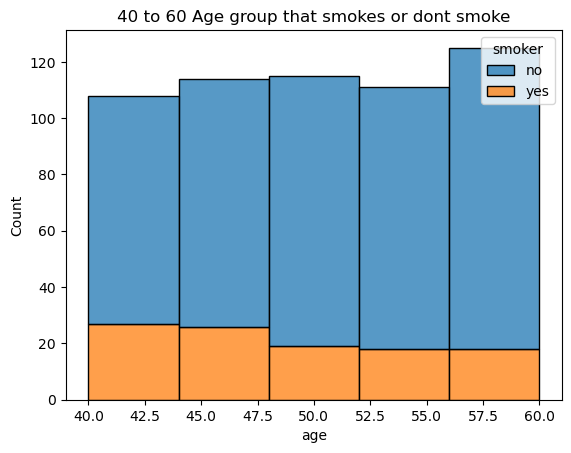

In [19]:
#Creating age group compared to people who smoke and not smoke
filterdf = df[(df['age'] >= 40) & (df['age'] <= 60)]
plt.title('40 to 60 Age group that smokes or dont smoke')
sns.histplot(data=filterdf, x='age', hue='smoker', bins=5, multiple='stack')
plt.show()


Based on the histogram we can see that majority of people from 40 to 60 doesn't smoke. This observation holds valuable implications, suggesting that as individuals enter the 40 to 60 age bracket, there is a prevalent inclination towards a non-smoking lifestyle.


In [20]:
#Average charge per age group
filterdf = df[(df['age'] >= 40) & (df['age'] <= 60)]
charges = filterdf['charges']
mean = np.mean(charges)
print(f'The average charge for the age group of 40 to 60 is {mean:.2f}.')


The average charge for the age group of 40 to 60 is 15694.79.


#  Additional Investigation 

Recognizing the unique nature of smoking and sex variables, both lacking numerical values, we made a decision to conduct separate testing for each to check their influence on insurance pricing (charges). The rationale behind this approach stems from the need for a more specific examination of these categorical factors, given their potential significance in shaping the financial aspects of insurance pricing.

# Chi Test of Independence for Smokers

▪ H0:Smoking habits and charges are independent.

▪ Ha:Smoking habits and charges are dependent.

▪ Significance level, α= 0.05

In [21]:
#filter data by age group
filterdf1 = df[(df['age'] >= 40) & (df['age'] <= 50) & (df['charges'] > 15694.79)] 
filterdf1.head()

,age,sex,bmi,children,smoker,region,charges
52,48,male,28.000,1,yes,southwest,23568.27200
85,45,male,22.895,2,yes,northwest,21098.55405
123,44,male,31.350,1,yes,northeast,39556.49450
146,46,male,30.495,3,yes,northwest,40720.55105
153,42,female,23.370,0,yes,northeast,19964.74630


In [22]:
#filter data by age group
filterdf2 = df[(df['age'] >= 50) & (df['age'] <= 60) & (df['charges'] <=15694.79)] 
filterdf2.head()

,age,sex,bmi,children,smoker,region,charges
13,56,female,39.820,0,no,southeast,11090.71780
16,52,female,30.780,1,no,northeast,10797.33620
18,56,male,40.300,0,no,southwest,10602.38500
20,60,female,36.005,0,no,northeast,13228.84695
25,59,female,27.720,3,no,southeast,14001.13380


In [23]:
#testing
SmokeAge1 = filterdf1['smoker']
#print(len(filterdf1), len(SmokeAge1)) #lengths are the same should be ok
SmokeAge2 = filterdf2['smoker']
#print(len(filterdf2), len(SmokeAge2))
#print(SmokeAge)


SmokeYes1 = []
SmokeNo1 = []
for i in SmokeAge1:
    if i == 'yes':
        SmokeYes1.append(i)
    elif i == 'no':
        SmokeNo1.append(i)
        
SmokeYes2 = []
SmokeNo2 = []
for j in SmokeAge2:
    if j == 'yes':
        SmokeYes2.append(j)
    elif j == 'no':
        SmokeNo2.append(j)
        
        #check if all the data was read
CountSmYes1 = len(SmokeYes1)
CountSmNo1 = len(SmokeNo1)
totalCount1 = CountSmYes1 + CountSmNo1
#print(totalCount1,len(filterdf1)) #they are the same

CountSmYes2 = len(SmokeYes2)
CountSmNo2 = len(SmokeNo2)
totalCount2 = CountSmYes2 + CountSmNo2
#print(totalCount2,len(filterdf2))

#for this we have to decide what we want to compare smokers to e.g. test of independence for smokers and sex, or smokers and a > or < a certain age, etc

#Chi square test for independence 

YSmoke = [CountSmYes1,CountSmYes2] #1 is for > 10k , 2 for <10k
NSmoke= [CountSmNo1, CountSmNo2]
#df = (row - 1)*(column -1)
dof = (2-1)*(2-1) 
cv = stats.chi2.ppf(q=0.95, df=dof) #chi square value
#print(cv)

# Expected value = ((Row total)*(Column Total))/N
RY = sum(YSmoke)  # row total for smokers
RN = sum(NSmoke)  # row total for non smokers
N = RY + RN   # total
YSmkE = [] #Expected values for smokers
NSmkE= [] #Expected values for non smokers
for i in range(len(YSmoke)):
    Y = (RY * (YSmoke[i] + NSmoke[i])) / N
    YSmkE.append(Y)
for i in range(len(NSmoke)):
    V = (RN * (YSmoke[i] + NSmoke[i])) / N
    NSmkE.append(V)
    
# Check expected values
#print("Expected values for Smokers:", YSmkE)
#print("Expected values for non Smokers:", NSmkE) 

# Calculate the chi-squared statistic using append
chi_squared_values = []
for i in range(len(YSmoke)):
    c = ((YSmoke[i] - YSmkE[i])**2 / YSmkE[i] + (NSmoke[i] - NSmkE[i])**2 / NSmkE[i])
    chi_squared_values.append(c)

chi_squared = sum(chi_squared_values)

# Display the result rounded to two decimal places
print("Chi-squared statistic:", round(chi_squared, 2),"Critical Value:",round(cv,2))

Chi-squared statistic: 221.59 Critical Value: 3.84


**Conclusion**: Since Chi-Square statistic is > than Critical Value we reject the null hypothesis and therefore conclude that smoking do affect the price (charges) of insurance and are dependent. Recognizing the influence of smoking habits on charges introduces a crucial metric that requires careful consideration in our pricing models. Integrating this test result into our criteria not only enhances the accuracy of our pricing structures but also serves as a proactive measure to forestall potential challenges associated with unbalanced pricing. 

# Chi Test of Independence for Sex

▪ H0:Sex and charges are independent.

▪ Ha:Sex and charges are dependent.

▪ Significance level, α= 0.05

In [24]:
#testing
SexAge1 = filterdf1['sex']
#print(len(filterdf1), len(SexAge1)) #lengths are the same should be ok
SexAge2 = filterdf2['sex']
#print(len(filterdf2), len(SexAge2))
#print(SmokeAge)

In [25]:
#check
SexAge1.head()

52       male
85       male
123      male
146      male
153    female
Name: sex, dtype: object

In [26]:
#filter data by smokers with charges under ___
Male1 = []
Female1 = []
for i in SexAge1:
    if i == 'male':
        Male1.append(i)
    elif i == 'female':
        Female1.append(i)
        
Male2 = []
Female2 = []
for j in SexAge2:
    if j == 'male':
        Male2.append(j)
    elif j == 'female':
        Female2.append(j)
        
#check if all the data was read
CountMale1 = len(Male1)
CountFemale1 = len(Female1)
total1 = CountMale1 + CountFemale1
#print(totalCount1,len(filterdf1)) #they are the same

CountMale2 = len(Male2)
CountFemale2 = len(Female2)
total2 = CountMale2 + CountFemale2
#print(total2,len(filterdf2))

#Chi square test for independence 

Male = [CountMale1,CountMale2] #1 is for > 10k , 2 for <10k
Female= [CountFemale1, CountFemale2]
#df = (row - 1)*(column -1)
dof = (2-1)*(2-1) 
cv = stats.chi2.ppf(q=0.95, df=dof) #chi square value
#print(cv)

# Expected value = ((Row total)*(Column Total))/N
NM = sum(Male)  # row total for Males
NF = sum(Female)  # row total for Females
N = NM + NF   # total
ME = [] #Expected values for Males
FE= [] #Expected values for Females
for i in range(len(Male)):
    Y = (NM * (Male[i] + Female[i])) / N
    ME.append(Y)
for i in range(len(Female)):
    V = (NF * (Male[i] + Female[i])) / N
    FE.append(V)
    
# Check expected values
#print("Expected values for Males:",ME )
#print("Expected values for Females:", FE) 

# Calculate the chi-squared statistic using append
chi_squared_values = []
for i in range(len(ME)):
    c = ((Male[i] - ME[i])**2 / ME[i] + (Female[i] - FE[i])**2 / FE[i])
    chi_squared_values.append(c)

chi_squared = sum(chi_squared_values)

# Display the result rounded to two decimal places
print("Chi-squared statistic:", round(chi_squared, 2), "Critical value:",round(cv,2))


Chi-squared statistic: 0.81 Critical value: 3.84


**Conclusion**: Since the Chi squared statistic is < Critical value, We fail to reject the null hypothesis and therefore conclude that sex doesnt affect the price (Charges) and are independent of each other. In practical terms, this means that the pricing of insurance charges remains unaffected by the gender of the client. This pivotal finding holds valuable implications for the development of a more inclusive and generalized pricing strategy. By recognizing that gender does not exert influence on charges, we can move towards a more equitable and unbiased approach in our predictive models.

# Quantifying Smokers for our prediction model

In [27]:
Smoker = df['smoker']
df4 = df 
SmokeNum = []
for i in Smoker:
    if i == 'yes':
        SmokeNum.append(1)
    elif i == 'no':
        SmokeNum.append(0)
#print(len(Smoker),len(SmokeNum),len(df))
#print(SmokeNum)
df4['SmokeNum'] = SmokeNum

# Prediction Model

In [28]:
#prediction model
X = df4[['age','bmi','children','SmokeNum']]
Y = df4['charges']
lr = LinearRegression()
lr.fit(X,Y)
b = lr.intercept_
m1, m2,m3,m4 = lr.coef_ #two slopes since there is two x's, m1 for age m2 for bmi
Ypred = lr.predict(X)
r2 = r2_score(Y,Ypred)
MSE = mean_squared_error(Y,Ypred)
print(m1,m2,m3,b)
print('r2 value is:',r2,'Mean squared error is:', MSE)

257.8495072765738 321.85140246534127 473.5023156137571 -12102.7693627279
r2 value is: 0.749694530346479 Mean squared error is: 36680455.99149378


With r2 closer 1, we can conclude that the chosen variables (Age, bmi, children, smoker) are indeed well fitted on predicting insurance prices.

In [29]:
lr.fit(X,Y)

LinearRegression()

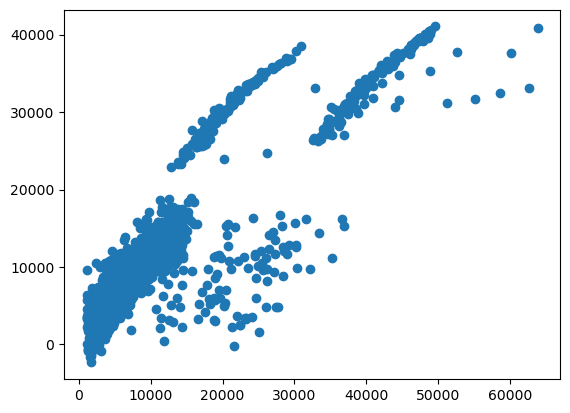

In [30]:
Ypred = lr.predict(X)
plt.scatter(Y,Ypred)

# Test Model

**Test 1**: 55 year old, BMI of 25 which is outside of our ideal range of 18.5 to 24.9, with 2 children and a smoker

In [45]:
x1 = 55 #change this to whatever age we want to test
x2 = 25 #change this to whatever bmi we want
x3 = 2 #change this to number of children
x4 = 1 #change to 1 for smoker 0 for non smoker
Ytest = m1*x1 +m2*x2+m3*x3 +b
if x4 == 1:
    x5 = "a smoker"
else:
    x5 = "not a smoker"
print(f'Predicted charges for a {x1} year old with a bmi of {x2} and {x3} children and is {x5} is: {Ytest:.2f}')

Predicted charges for a 55 year old with a bmi of 25 and 2 children and is a smoker is: 11072.24


**Test 2**: 55 year old, A BMI in the ideal range which is between 18.5 to 24.9 so we are using 22 for this test, with 0 children and not a smoker

In [53]:
x1 = 55 #change this to whatever age we want to test
x2 = 22 #change this to whatever bmi we want
x3 = 0 #change this to number of children
x4 = 0 #change to 1 for smoker 0 for non smoker
Ytest = m1*x1 +m2*x2+m3*x3 +b
if x4 == 1:
    x5 = "a smoker"
else:
    x5 = "not a smoker"
print(f'Predicted charges for a {x1} year old with a bmi of {x2} and {x3} children and is {x5} is: {Ytest:.2f}') 

Predicted charges for a 55 year old with a bmi of 22 and 0 children and is not a smoker is: 9159.68


For the next few test we will try predicting the insurance price for people outside of 40 to 60 age group to see if the factors we mentioned from the testing above affect the price of insurance.

**Test 3**: 35 year old, BMI of 25 which is barely outside of the ideal bmi range but the same as our first test, with 2 children and a smoker

In [54]:
x1 = 35 #change this to whatever age we want to test
x2 = 25 #change this to whatever bmi we want
x3 = 2 #change this to number of children
x4 = 1 #change to 1 for smoker 0 for non smoker
Ytest = m1*x1 +m2*x2+m3*x3 +b
if x4 == 1:
    x5 = "a smoker"
else:
    x5 = "not a smoker"
print(f'Predicted charges for a {x1} year old with a bmi of {x2} and {x3} children and is {x5} is: {Ytest:.2f}') 

Predicted charges for a 35 year old with a bmi of 25 and 2 children and is a smoker is: 5915.25


**Test 4**: 35 year old, BMI of 22 which is within the ideal bmi range, with 0 children and not a smoker

In [55]:
x1 = 35 #change this to whatever age we want to test
x2 = 22 #change this to whatever bmi we want
x3 = 0 #change this to number of children
x4 = 0 #change to 1 for smoker 0 for non smoker
Ytest = m1*x1 +m2*x2+m3*x3 +b
if x4 == 1:
    x5 = "a smoker"
else:
    x5 = "not a smoker"
print(f'Predicted charges for a {x1} year old with a bmi of {x2} and {x3} children and is {x5} is: {Ytest:.2f}') 

Predicted charges for a 35 year old with a bmi of 22 and 0 children and is not a smoker is: 4002.69


Our model testing has brought to a compelling trend wherein prices exhibit a substantial increase in response to key factors namely age, BMI, the number of children, and smoking habits. This evidence supports our findings that these specific criteria wield considerable influence over pricing dynamics. The observed price escalation across these variables underscores their pivotal role in shaping profitability. 

# Conclusion

<br> Through our comprehensive analysis and testing, a pattern has emerged, highlighting the age bracket from 40 to 60 as the age group that generates the highest charges. Beyond age alone, our findings also found correlation of diverse factors shaping insurance pricing. Variables such as Age, Body Mass Index (BMI), the number of children, and smoking habits are great factors, showing substantial influence on the overall cost of insurance. Notably, when these factors converge within the specified age range, they contribute to the pricing structure, amplifying the financial considerations for clients within this demographic. This approach to analyzing the elements impacting insurance costs enables providers to fine-tune their pricing models, ensuring a more accurate and equitable reflection of risk factors and client demographics, particularly within the 40 to 60 age group